In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv("Malware dataset.csv")

In [3]:
data.head()

,hash,millisecond,classification,state,usage_counter,prio,static_prio,normal_prio,policy,vm_pgoff,...,nivcsw,min_flt,maj_flt,fs_excl_counter,lock,utime,stime,gtime,cgtime,signal_nvcsw
0,42fb5e2ec009a05ff5143227297074f1e9c6c3ebb9c914...,0,malware,0,0,3069378560,14274,0,0,0,...,0,0,120,0,3204448256,380690,4,0,0,0
1,42fb5e2ec009a05ff5143227297074f1e9c6c3ebb9c914...,1,malware,0,0,3069378560,14274,0,0,0,...,0,0,120,0,3204448256,380690,4,0,0,0
2,42fb5e2ec009a05ff5143227297074f1e9c6c3ebb9c914...,2,malware,0,0,3069378560,14274,0,0,0,...,0,0,120,0,3204448256,380690,4,0,0,0
3,42fb5e2ec009a05ff5143227297074f1e9c6c3ebb9c914...,3,malware,0,0,3069378560,14274,0,0,0,...,0,0,120,0,3204448256,380690,4,0,0,0
4,42fb5e2ec009a05ff5143227297074f1e9c6c3ebb9c914...,4,malware,0,0,3069378560,14274,0,0,0,...,0,0,120,0,3204448256,380690,4,0,0,0


In [4]:
data.columns

Index(['hash', 'millisecond', 'classification', 'state', 'usage_counter',
       'prio', 'static_prio', 'normal_prio', 'policy', 'vm_pgoff',
       'vm_truncate_count', 'task_size', 'cached_hole_size', 'free_area_cache',
       'mm_users', 'map_count', 'hiwater_rss', 'total_vm', 'shared_vm',
       'exec_vm', 'reserved_vm', 'nr_ptes', 'end_data', 'last_interval',
       'nvcsw', 'nivcsw', 'min_flt', 'maj_flt', 'fs_excl_counter', 'lock',
       'utime', 'stime', 'gtime', 'cgtime', 'signal_nvcsw'],
      dtype='object')

In [5]:
len(data.columns)

35

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 35 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   hash               100000 non-null  object
 1   millisecond        100000 non-null  int64 
 2   classification     100000 non-null  object
 3   state              100000 non-null  int64 
 4   usage_counter      100000 non-null  int64 
 5   prio               100000 non-null  int64 
 6   static_prio        100000 non-null  int64 
 7   normal_prio        100000 non-null  int64 
 8   policy             100000 non-null  int64 
 9   vm_pgoff           100000 non-null  int64 
 10  vm_truncate_count  100000 non-null  int64 
 11  task_size          100000 non-null  int64 
 12  cached_hole_size   100000 non-null  int64 
 13  free_area_cache    100000 non-null  int64 
 14  mm_users           100000 non-null  int64 
 15  map_count          100000 non-null  int64 
 16  hiwater_rss        10

In [7]:
data.describe()

,millisecond,state,usage_counter,prio,static_prio,normal_prio,policy,vm_pgoff,vm_truncate_count,task_size,...,nivcsw,min_flt,maj_flt,fs_excl_counter,lock,utime,stime,gtime,cgtime,signal_nvcsw
count,100000.000000,1.000000e+05,100000.0,1.000000e+05,100000.000000,100000.0,100000.0,100000.0,100000.000000,100000.0,...,100000.000000,100000.000000,100000.000000,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.00000,100000.0,100000.0
mean,499.500000,1.577683e+05,0.0,3.069706e+09,18183.900070,0.0,0.0,0.0,15312.739510,0.0,...,32.991160,2.053130,117.920240,1.109190,3.204448e+09,385415.451970,4.059310,1.66142,0.0,0.0
std,288.676434,9.361726e+05,0.0,2.963061e+05,4609.792765,0.0,0.0,0.0,3256.475008,0.0,...,52.730176,13.881382,3.116892,2.160466,0.000000e+00,10144.036494,0.822848,3.26304,0.0,0.0
min,0.000000,0.000000e+00,0.0,3.069190e+09,13988.000000,0.0,0.0,0.0,9695.000000,0.0,...,0.000000,0.000000,112.000000,0.000000,3.204448e+09,371782.000000,3.000000,0.00000,0.0,0.0
25%,249.750000,0.000000e+00,0.0,3.069446e+09,14352.000000,0.0,0.0,0.0,12648.000000,0.0,...,1.000000,0.000000,114.000000,0.000000,3.204448e+09,378208.000000,3.000000,0.00000,0.0,0.0
50%,499.500000,0.000000e+00,0.0,3.069698e+09,16159.000000,0.0,0.0,0.0,15245.000000,0.0,...,9.000000,1.000000,120.000000,0.000000,3.204448e+09,383637.000000,4.000000,0.00000,0.0,0.0
75%,749.250000,4.096000e+03,0.0,3.069957e+09,22182.000000,0.0,0.0,0.0,17663.000000,0.0,...,46.000000,1.000000,120.000000,1.000000,3.204448e+09,390324.000000,5.000000,1.00000,0.0,0.0
max,999.000000,4.326605e+07,0.0,3.070222e+09,31855.000000,0.0,0.0,0.0,27157.000000,0.0,...,365.000000,256.000000,120.000000,18.000000,3.204448e+09,421913.000000,7.000000,15.00000,0.0,0.0


In [8]:
data.shape

(100000, 35)

In [9]:
data.isnull().sum()

hash                 0
millisecond          0
classification       0
state                0
usage_counter        0
prio                 0
static_prio          0
normal_prio          0
policy               0
vm_pgoff             0
vm_truncate_count    0
task_size            0
cached_hole_size     0
free_area_cache      0
mm_users             0
map_count            0
hiwater_rss          0
total_vm             0
shared_vm            0
exec_vm              0
reserved_vm          0
nr_ptes              0
end_data             0
last_interval        0
nvcsw                0
nivcsw               0
min_flt              0
maj_flt              0
fs_excl_counter      0
lock                 0
utime                0
stime                0
gtime                0
cgtime               0
signal_nvcsw         0
dtype: int64

In [10]:
data=data.dropna(how="any",axis=0)

In [11]:
data["classification"].value_counts()

malware    50000
benign     50000
Name: classification, dtype: int64

In [12]:
data['classification'] = data.classification.map({'benign':0, 'malware':1})

C:\Users\kondaveeti\anaconda3\envs\tcl\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


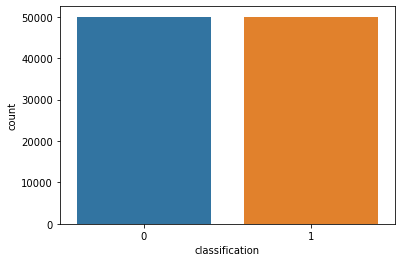

In [14]:
sns.countplot(data["classification"])
plt.show()

In [23]:
def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    df = df.dropna('columns')
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(df)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()
    
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()
    
def plotCorrelationMatrix(df, graphWidth):
    #filename = df.dataframeName
    df = df.dropna('columns') # drop columns with NaN
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.show()

C:\Users\kondaveeti\anaconda3\envs\tcl\lib\site-packages\ipykernel_launcher.py:25: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.


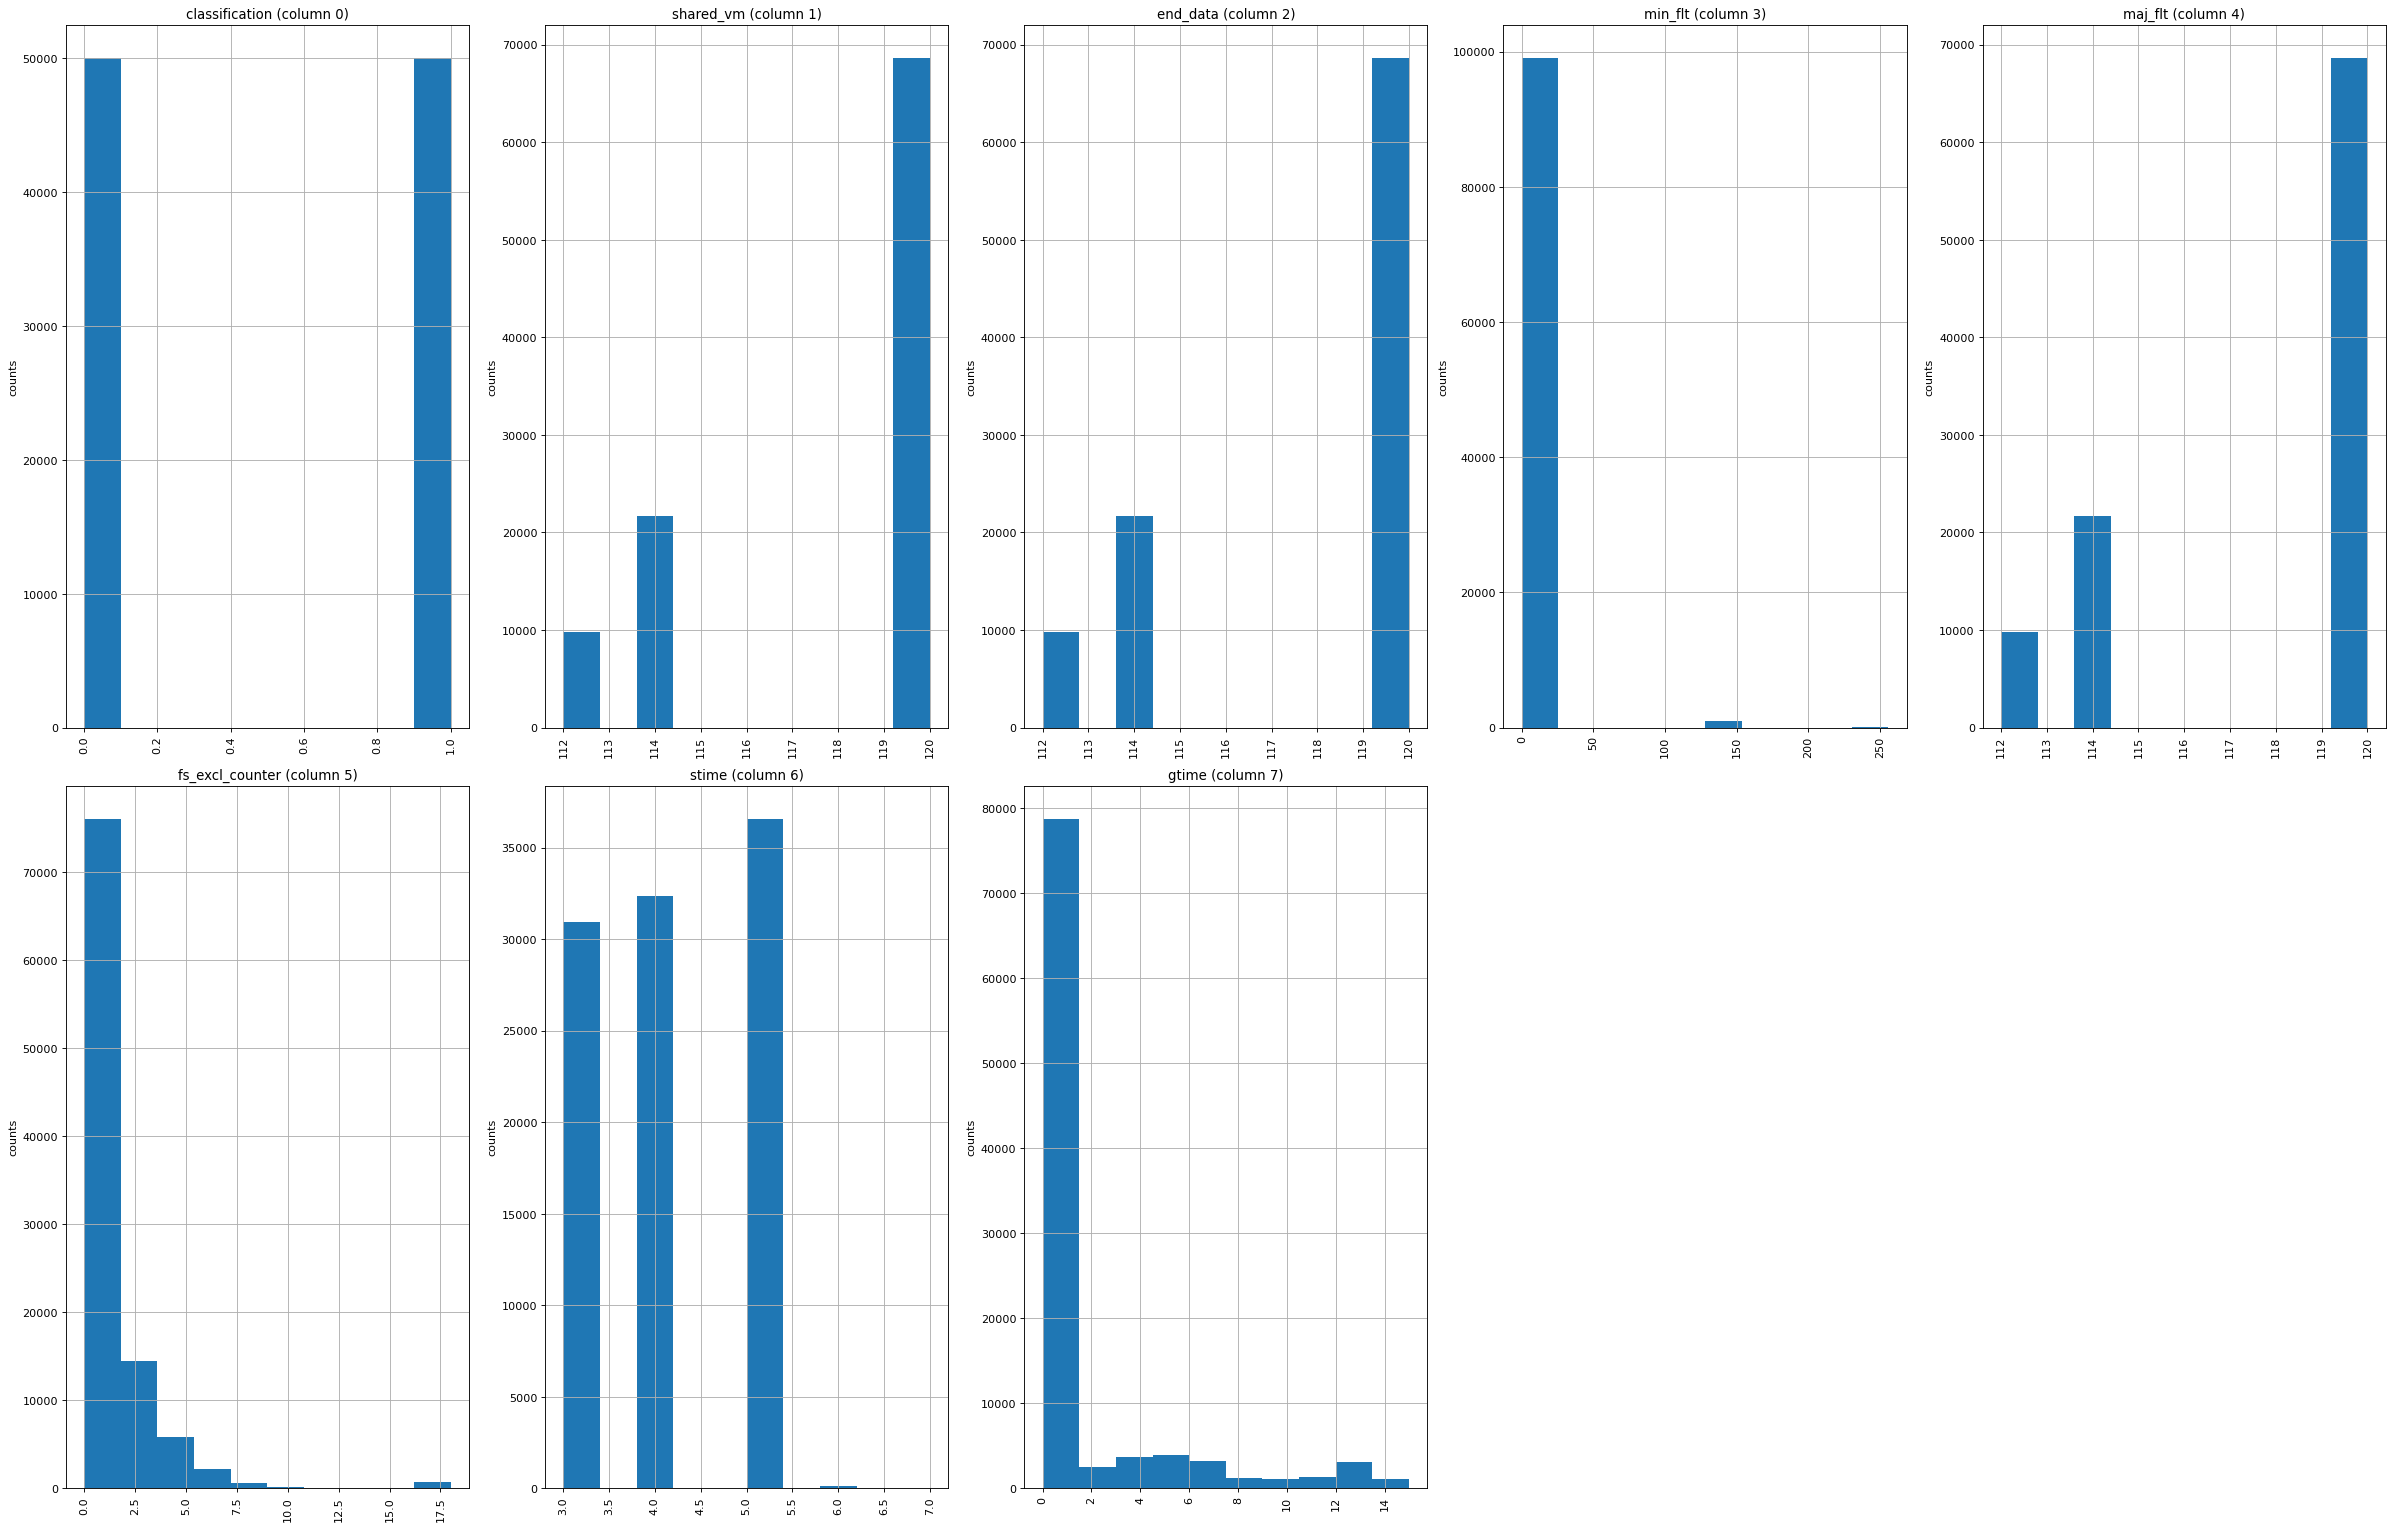

In [18]:
plotPerColumnDistribution(data, 10, 5)

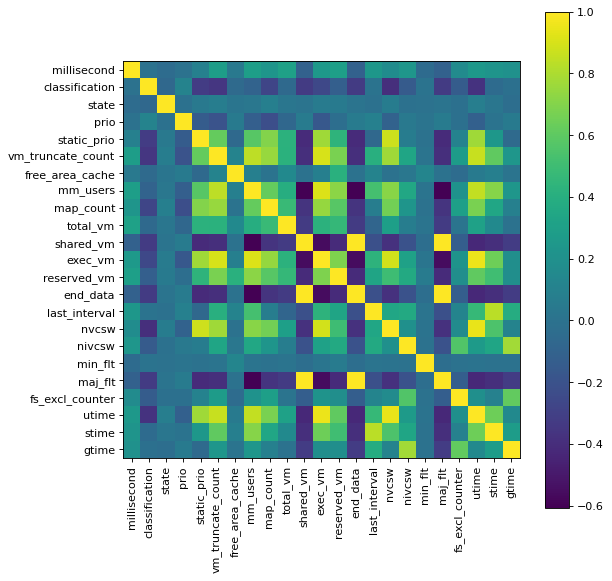

In [24]:
plotCorrelationMatrix(data, 8)

In [26]:
x=data.drop(["hash","classification",'vm_truncate_count','shared_vm','exec_vm','nvcsw','maj_flt','utime'],axis=1)
x.head()

,millisecond,state,usage_counter,prio,static_prio,normal_prio,policy,vm_pgoff,task_size,cached_hole_size,...,end_data,last_interval,nivcsw,min_flt,fs_excl_counter,lock,stime,gtime,cgtime,signal_nvcsw
0,0,0,0,3069378560,14274,0,0,0,0,0,...,120,3473,0,0,0,3204448256,4,0,0,0
1,1,0,0,3069378560,14274,0,0,0,0,0,...,120,3473,0,0,0,3204448256,4,0,0,0
2,2,0,0,3069378560,14274,0,0,0,0,0,...,120,3473,0,0,0,3204448256,4,0,0,0
3,3,0,0,3069378560,14274,0,0,0,0,0,...,120,3473,0,0,0,3204448256,4,0,0,0
4,4,0,0,3069378560,14274,0,0,0,0,0,...,120,3473,0,0,0,3204448256,4,0,0,0


In [28]:
y=data["classification"]

In [29]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)

In [30]:
from sklearn.metrics import classification_report,f1_score,precision_score,recall_score
from sklearn.linear_model import LogisticRegression
clf_lr = LogisticRegression(random_state=0)
clf_lr.fit(X_train,y_train)
pred = clf_lr.predict(X_test)
print("Accuracy: ",clf_lr.score(X_test, y_test))
print("recall_score: ",recall_score(y_test,pred))
print("precision_score: ",precision_score(y_test,pred))
print("f1_score: ",f1_score(y_test,pred))

Accuracy:  0.49833333333333335
recall_score:  1.0
precision_score:  0.49833333333333335
f1_score:  0.6651835372636263


In [31]:
from sklearn.svm import LinearSVC
clf_svc = LinearSVC(random_state=0)
clf_svc.fit(X_train,y_train)
clf_svc.score(X_test,y_test)
pred = clf_svc.predict(X_test)
print("Accuracy: ",clf_svc.score(X_test, y_test))
print("recall_score: ",recall_score(y_test,pred))
print("precision_score: ",precision_score(y_test,pred))
print("f1_score: ",f1_score(y_test,pred))

Accuracy:  0.49946666666666667
recall_score:  1.0
precision_score:  0.49889875191884137
f1_score:  0.6656870602903197


C:\Users\kondaveeti\anaconda3\envs\tcl\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [32]:
from sklearn.naive_bayes import GaussianNB
clf_gnb = GaussianNB()
clf_gnb.fit(X_train,y_train)
clf_gnb.score(X_test,y_test)
pred = clf_gnb.predict(X_test)
print("Accuracy: ",clf_gnb.score(X_test, y_test))
print("recall_score: ",recall_score(y_test,pred))
print("precision_score: ",precision_score(y_test,pred))
print("f1_score: ",f1_score(y_test,pred))

Accuracy:  0.6274
recall_score:  0.8965886287625418
precision_score:  0.581871852752214
f1_score:  0.7057336913599748


In [33]:
from sklearn.ensemble import RandomForestClassifier
clf_rfc = RandomForestClassifier(random_state=0)
clf_rfc.fit(X_train,y_train)
clf_rfc.score(X_test,y_test)
pred = clf_rfc.predict(X_test)
print("Accuracy: ",clf_gnb.score(X_test, y_test))
print("recall_score: ",recall_score(y_test,pred))
print("precision_score: ",precision_score(y_test,pred))
print("f1_score: ",f1_score(y_test,pred))

Accuracy:  0.6274
recall_score:  1.0
precision_score:  1.0
f1_score:  1.0


In [35]:
from xgboost import XGBClassifier
clf_xgb = XGBClassifier()
clf_xgb.fit(X_train, y_train)
pred = clf_xgb.predict(X_test)
print("Accuracy: ",clf_xgb.score(X_test, y_test))
print("recall_score: ",recall_score(y_test,pred))
print("precision_score: ",precision_score(y_test,pred))
print("f1_score: ",f1_score(y_test,pred))

Accuracy:  1.0
recall_score:  1.0
precision_score:  1.0
f1_score:  1.0


In [37]:
from lightgbm import LGBMClassifier
clf_lgbm = LGBMClassifier()
clf_lgbm.fit(X_train, y_train)
pred = clf_lgbm.predict(X_test)
print("Accuracy: ",clf_lgbm.score(X_test, y_test))
print("recall_score: ",recall_score(y_test,pred))
print("precision_score: ",precision_score(y_test,pred))
print("f1_score: ",f1_score(y_test,pred))

Accuracy:  1.0
recall_score:  1.0
precision_score:  1.0
f1_score:  1.0
